In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
train_losses = pd.read_csv('logs/04_baseline_scratch_train_loss.csv')
valid_losses = pd.read_csv('logs/04_baseline_scratch_valid_loss.csv')

In [ ]:
train_losses = train_losses.loc[train_losses['epoch'].isin(range(16)) | train_losses.iloc[len(train_losses.index)-1]]

In [ ]:
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [ ]:
train_losses

,epoch,soft-sweep-3 - _step,soft-sweep-3 - _step__MIN,soft-sweep-3 - _step__MAX,soft-sweep-3 - train_loss,soft-sweep-3 - train_loss__MIN,soft-sweep-3 - train_loss__MAX,celestial-sweep-1 - _step,celestial-sweep-1 - _step__MIN,celestial-sweep-1 - _step__MAX,...,celestial-sweep-4 - _step__MAX,celestial-sweep-4 - train_loss,celestial-sweep-4 - train_loss__MIN,celestial-sweep-4 - train_loss__MAX,pleasant-sweep-2 - _step,pleasant-sweep-2 - _step__MIN,pleasant-sweep-2 - _step__MAX,pleasant-sweep-2 - train_loss,pleasant-sweep-2 - train_loss__MIN,pleasant-sweep-2 - train_loss__MAX
92,1.0,92,92,92,1.037614,1.037614,1.037614,92,92,92,...,92,1.019566,1.019566,1.019566,92,92,92,1.337841,1.337841,1.337841
185,2.0,185,185,185,0.303388,0.303388,0.303388,185,185,185,...,185,0.316543,0.316543,0.316543,185,185,185,0.402434,0.402434,0.402434
278,3.0,278,278,278,0.171921,0.171921,0.171921,278,278,278,...,278,0.191555,0.191555,0.191555,278,278,278,0.185490,0.185490,0.185490
371,4.0,371,371,371,0.121300,0.121300,0.121300,371,371,371,...,371,0.150181,0.150181,0.150181,371,371,371,0.136710,0.136710,0.136710
464,5.0,464,464,464,0.124239,0.124239,0.124239,464,464,464,...,464,0.116176,0.116176,0.116176,464,464,464,0.084362,0.084362,0.084362
557,6.0,557,557,557,0.092450,0.092450,0.092450,557,557,557,...,557,0.094051,0.094051,0.094051,557,557,557,0.058757,0.058757,0.058757
650,7.0,650,650,650,0.069751,0.069751,0.069751,650,650,650,...,650,0.059511,0.059511,0.059511,650,650,650,0.049263,0.049263,0.049263
743,8.0,743,743,743,0.048937,0.048937,0.048937,743,743,743,...,743,0.047524,0.047524,0.047524,743,743,743,0.033863,0.033863,0.033863
836,9.0,836,836,836,0.050412,0.050412,0.050412,836,836,836,...,836,0.036543,0.036543,0.036543,836,836,836,0.021362,0.021362,0.021362
929,10.0,929,929,929,0.022348,0.022348,0.022348,929,929,929,...,929,0.031561,0.031561,0.031561,929,929,929,0.012284,0.012284,0.012284


In [ ]:
ys = {int(list(filter(str.isdigit, col))[0]): train_losses[col] for col in train_losses.columns if col.endswith('train_loss')}

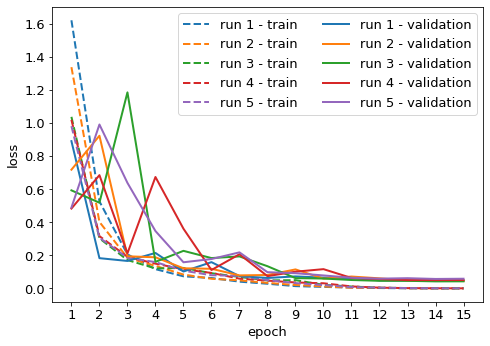

In [ ]:
plt.rc('font', size=13) 
fig, ax = plt.subplots(figsize=(7, 5))

values = {int(list(filter(str.isdigit, col))[0]): train_losses[col] for col in train_losses.columns if col.endswith('train_loss')}
for run_no, ys in sorted(values.items()):
    plt.plot(train_losses['epoch'], ys, label=f'run {run_no} - train', linewidth=2, linestyle='--', color=cycle[run_no-1])
    
values = {int(list(filter(str.isdigit, col))[0]): valid_losses[col] for col in valid_losses.columns if col.endswith('valid_loss')}
for run_no, ys in sorted(values.items()): 
        plt.plot(valid_losses['epoch'], ys, label=f'run {run_no} - validation', linewidth=2, linestyle='-', color=cycle[run_no-1])

plt.xticks(np.arange(1, 16))   
# plt.xlabel('epoch', fontsize='x-large')
# plt.ylabel('loss', fontsize='x-large')
# plt.legend(ncol=2, fontsize='large')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(ncol=2)

#plt.ylim([-0.1, 2])

fig.tight_layout()
fig.savefig('../figs/glitches/04_baseline_best_train_curves_v2.pdf', dpi=600)

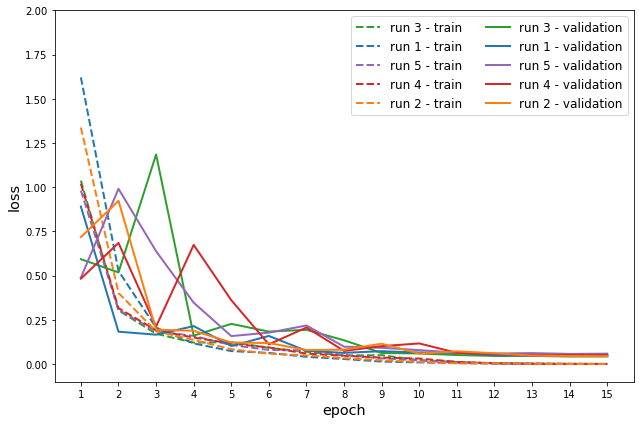

In [ ]:
fig, ax = plt.subplots(figsize=(9, 6))
run_no = 0
    
for col in train_losses.columns: 
    if col.endswith('train_loss'):
        run_no = int(list(filter(str.isdigit, col))[0])
        plt.plot(train_losses['epoch'], train_losses[col], label=f'run {run_no} - train', linewidth=2, linestyle='--', color=cycle[run_no-1])
run_no = 0

for col in valid_losses.columns: 
    if col.endswith('valid_loss'):
        run_no = int(list(filter(str.isdigit, col))[0])
        plt.plot(valid_losses['epoch'], valid_losses[col], label=f'run {run_no} - validation', linewidth=2, linestyle='-', color=cycle[run_no-1])
plt.xticks(np.arange(1, 16))   
plt.xlabel('epoch', fontsize='x-large')
plt.ylabel('loss', fontsize='x-large')
plt.ylim([-0.1, 2])
plt.legend(ncol=2, fontsize='large')

fig.tight_layout()
#fig.savefig('../figs/glitches/04_baseline_best_train_curves.png', dpi=300)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<matplotlib.legend.Legend>

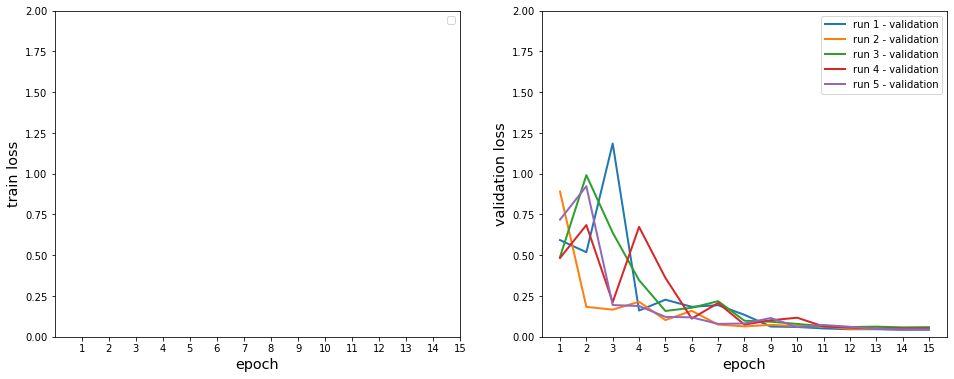

In [ ]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(16, 6))
run_no = 0

plt.subplot(1, 2, 1)
for col in train_losses.columns: 
    if col.endswith('raw_loss'):
        run_no += 1
        plt.plot(train_losses['epoch'], train_losses[col], label=f'run {run_no} - train', linewidth=2, linestyle='-', color=cycle[run_no-1])
run_no = 0
plt.xticks(np.arange(1, 16))   
plt.ylim([0, 2])
plt.xlabel('epoch', fontsize='x-large')
plt.ylabel('train loss', fontsize='x-large')

plt.legend()

plt.subplot(1, 2, 2)
for col in valid_losses.columns: 
    if col.endswith('valid_loss'):
        run_no += 1
        plt.plot(valid_losses['epoch'], valid_losses[col], label=f'run {run_no} - validation', linewidth=2, linestyle='-', color=cycle[run_no-1])
plt.xticks(np.arange(1, 16))   
plt.xlabel('epoch', fontsize='x-large')
plt.ylabel('validation loss', fontsize='x-large')
plt.ylim([0, 2])
plt.legend()